3rd Lab Assignment in Artificial Inteligence 

Kolovos Leonidas 03113058

In this exercise, various machine learning algorithms will be implemented for the automatic recognition between 3 types of music from the data provided by the Spotify service. Specifically, two sets of data will be given $$Ζ_{train}=\{(x_1,y_1),\dots,(x_n,y_n)\}$$ $$Z_{test} = \{(x_j,y_j),\dots{,(x_k,y_k)}\}$$ where each $x_i\in{\mathbb{R}^p}$ is a vector with the musical characteristics of each track (such as dancability, acousticness etc.) and $y_i$ is the type of piece - an integer at $ [0.2] $. In each case we are required to draw a classifier, ie an illustration $$f:\mathbb{R}^p\rightarrow{[0,2]}$$




# Part 1: Evaluation

In the first part of the exercise, functions will be implemented that will be used to evaluate the classifiers that will be used in the following parts.

Below you we create the Evaluate class, which calculates various metrics using the get_metrics method, locates and sorts objects that were erroneously sorted (get_sample_of_wrong method), and calculates the confusion matrix where the classifier predictions are visualized by category.

For this part we implement in the my_accuracy method the metric accuracy, which is defined as: 

$$accuracy = \frac{\#correct\_predictions}{\#data}$$



In [ ]:
from sklearn.metrics import confusion_matrix, f1_score, precision_score, recall_score
from matplotlib import pyplot as plt
import numpy as np
import random

class Evaluate:
    def __init__(self, y_true, y_pred):
        self.y_true = y_true
        self.y_pred = y_pred

    def my_accuracy(self):
      y_true = self.y_true
      y_pred = self.y_pred
      

      y_true = np.array(y_true)
      y_pred = np.array(y_pred)
      acc=np.sum(y_true==y_pred)/y_pred.shape[0]

      return acc

    def get_metrics(self):
        precision = precision_score(self.y_true, self.y_pred, average = "macro")
        recall = recall_score(self.y_true, self.y_pred, average = "macro")
        f1 = f1_score(self.y_true, self.y_pred, average = "macro")
        results = {"precision": precision, "recall": recall, "f1": f1, "accuracy": self.my_accuracy()}
        return results   
    
    def confusion_matrix(self):
        cm = confusion_matrix(self.y_true, self.y_pred)
        return cm 

    def get_evaluation_report(self):
        metrics = self.get_metrics()
        for m in metrics:
            print(m + ': ' + str(metrics[m]))
        cm = self.confusion_matrix()
        print("Confusion matrix: ")
        print(cm)

Example of using the class. Normally at x there will be data from the dataset.

In [ ]:
y_true = [1, 0, 1, 0, 0, 1, 1, 0]
y_pred = [1, 0, 1, 0, 1, 1, 0, 0]

eval = Evaluate(y_true, y_pred)
eval.get_evaluation_report()

precision: 0.75
recall: 0.75
f1: 0.75
accuracy: 0.75
Confusion matrix: 
[[3 1]
 [1 3]]


# Dataset

The dataset given to us contains a variety of music tracks for which various characteristics have been recorded, as well as the musical genre to which they belong. In this exercise we will work with a subset of (numerical) characteristics, which contribute to the definition of the music category of each track.

The characteristics that we will study in this exercise are acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness" while the categories in which we are called to classify the music tracks are "Electronic", "Rock", and "Rap".

In [ ]:
#Connect Google Colab with Google Drive

from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


We will use the DataFrames of the pandas library to manipulate our data.

In [ ]:
import pandas as pd
from tqdm.notebook import tqdm 

In [ ]:
# read data in the form of pandas DataFrame
data = pd.read_csv("/content/drive/MyDrive/AI/music_df_processed.csv")

# print the first 5 values of the DataFrame using .head() command
data.head()


,instance_id,artist_name,track_name,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,obtained_date,valence,music_genre
0,32894.0,Röyksopp,Röyksopp's Night Out,27.0,0.00468,0.652,-1.0,0.941,0.79200,A#,0.115,-5.201,Minor,0.0748,100.889,4-Apr,0.759,Electronic
1,46652.0,Thievery Corporation,The Shining Path,31.0,0.01270,0.622,218293.0,0.890,0.95000,D,0.124,-7.043,Minor,0.0300,115.002,4-Apr,0.531,Electronic
2,30097.0,Dillon Francis,Hurricane,28.0,0.00306,0.620,215613.0,0.755,0.01180,G#,0.534,-4.617,Major,0.0345,127.994,4-Apr,0.333,Electronic
3,62177.0,Dubloadz,Nitro,34.0,0.02540,0.774,166875.0,0.700,0.00253,C#,0.157,-4.498,Major,0.2390,128.014,4-Apr,0.270,Electronic
4,24907.0,What So Not,Divide & Conquer,32.0,0.00465,0.638,222369.0,0.587,0.90900,F#,0.157,-6.266,Major,0.0413,145.036,4-Apr,0.323,Electronic


In [ ]:
data.describe()

,instance_id,popularity,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,valence
count,45020.000000,45020.000000,45020.000000,45020.000000,4.502000e+04,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000,45020.000000
mean,55884.691892,44.263327,0.306596,0.558532,2.211695e+05,0.599553,0.181843,0.193951,-9.137016,0.093783,119.952961,0.456394
std,20728.197040,15.553972,0.341391,0.178858,1.276884e+05,0.264510,0.325847,0.161715,6.156400,0.101469,30.641701,0.247161
min,20002.000000,0.000000,0.000000,0.059600,-1.000000e+00,0.000792,0.000000,0.009670,-47.046000,0.022300,34.347000,0.000000
25%,38000.750000,34.000000,0.020100,0.442000,1.747230e+05,0.432000,0.000000,0.096900,-10.860000,0.036100,94.941500,0.257000
50%,55857.500000,45.000000,0.145000,0.568000,2.194385e+05,0.642000,0.000159,0.126000,-7.284000,0.048900,119.879000,0.448000
75%,73856.500000,56.000000,0.551000,0.687000,2.686400e+05,0.815250,0.154000,0.244000,-5.177000,0.098800,140.471250,0.648000
max,91759.000000,99.000000,0.996000,0.986000,4.497994e+06,0.999000,0.996000,1.000000,3.744000,0.942000,220.276000,0.992000


## Selection of x characteristics and y targets.

For reasons of simplicity we choose the features (inputs) and the target categories (genres). Bellow we split the data into a train / test set. The separation is 30% - test set, 70% - train set. y.


In [ ]:
# Characteristics
inputs = ["acousticness", "danceability", "energy", "instrumentalness", "liveness", "speechiness"]

# Category Targets 
output = "music_genre"
genres = ["Electronic", "Rock", "Rap"]

# we filter the DataFrame to maintain only the 3 categories that interest us.
data = data[data[output].isin(genres)]

# dictionary to map genre to label id 
genres_to_id = {genre: i for i, genre in enumerate(genres)}

# here we separate the data into train (70% of the data) / test set (30% of the data)
# we name the variables : 
# the features of the train set: x_train
# the target categories of the train set: y_train
# the characteristics of the test set: x_test
# the target categories of the test set: y_test
x_test, y_test, x_train, y_train = [], [], [], []

features = data[inputs]
labels = data[output]
print(features.head())
print(labels.head())

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.3)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)



   acousticness  danceability  energy  instrumentalness  liveness  speechiness
0       0.00468         0.652   0.941           0.79200     0.115       0.0748
1       0.01270         0.622   0.890           0.95000     0.124       0.0300
2       0.00306         0.620   0.755           0.01180     0.534       0.0345
3       0.02540         0.774   0.700           0.00253     0.157       0.2390
4       0.00465         0.638   0.587           0.90900     0.157       0.0413
0    Electronic
1    Electronic
2    Electronic
3    Electronic
4    Electronic
Name: music_genre, dtype: object
(9471, 6)
(9471,)
(4060, 6)
(4060,)


In [ ]:
np.unique(y_train)

array(['Electronic', 'Rap', 'Rock'], dtype=object)

## Data format

We should make sure that our data is in the correct format by printing the number of rows and columns for x_test, y_test, x_train, y_train.



In [ ]:
# Shape of x_test, y_test, x_train, y_train


print('Number of samples in train set:', X_train.shape[0])
print('Number of samples in test set:', X_test.shape[0])
print('Number of columns in train set:', X_train.shape[1])
print('Number of columns in test set:', X_test.shape[1])


Number of samples in train set: 9471
Number of samples in test set: 4060
Number of columns in train set: 6
Number of columns in test set: 6


Regarding the values ​​of the features, it is important to know their range, ie the maximum and the minimum value that each feature receives. 

In [ ]:
# Range of x_train, x_test columns

for col in X_train.columns:
  max_value = data[col].max()
  min_value = data[col].min()

  print('Range of values for', col, 'is: [', min_value, ',', max_value, ']')


Range of values for acousticness is: [ 1.39e-06 , 0.9940000000000001 ]
Range of values for danceability is: [ 0.0645 , 0.977 ]
Range of values for energy is: [ 0.00259 , 0.9990000000000001 ]
Range of values for instrumentalness is: [ 0.0 , 0.986 ]
Range of values for liveness is: [ 0.0173 , 0.991 ]
Range of values for speechiness is: [ 0.0224 , 0.922 ]


From the above analysis we can observe that our characteristics have about the same range. Specifically the interval [0, 1] as it results from the min, max. This is important as we ensure that all features will affect the results of the models equally. Otherwise we would have to scale the features.

# 2nd Part: Implementation of KNN

In the second part of the exercise you will implement the KNN algorithm for classification. The design plan for the nearest neighbor classifier k is:
- We store all the data ($ Z_ {train} $) in memory
  - Data can be stored in a table $ n \ times {p} $ using numpy
- We compare the input with the data and find the nearest k ($ k < n $) based on some distance.
- When given a "fresh" sample as a vector of $ x_i $ attributes we need a function that calculates the distance $ d (x_i, x_j) $, where $ x_j $ is the vector corresponding to the attributes of a sample of the training data . You will experiment with Euclidean distance and cosine distance. The training data is then sorted by distance from $ x_i $ and the nearest $ k $ are selected.
- We give the output the class to which the majority of k closest data belongs.

Once the classifier is built we will evaluate its performance on the first 100 samples of $ Z_ {test} $ for some k values ​​you choose, starting at $ k = 1 $.

In practice its very rarely needed to implement a machine learning algorithm from scratch, since there are ready-made implementations, e.g. in python packages, which are optimized and easy to use. 


We should also mention the cosine distance between two vectors u, v is defined as: $$ d (u, v) = 1 - \ frac {u \ cdot {v}} {|| u || _2 || v || _2} $$


In [ ]:
from numpy import linalg
class KNN:
    def __init__(self, x, y, k, distance = "euclidean"):
        self.x = x
        self.y = y
        self.k = k
        self.distance = distance
        
    ## Compute the distance between the two vectors (2 rows of the DataFrame)
    def get_distance(self, row1, row2):
      if self.distance=='euclidean':

        row1 = np.array(row1, dtype=np.float32)
        row2 = np.array(row2, dtype=np.float32)
        dist = linalg.norm(row1-row2)

      elif self.distance=='cosine':

        row1 = np.array(row1, dtype=np.float32)
        row2 = np.array(row2, dtype=np.float32)
        dist = 1 - (np.dot(row1, row2) / np.multiply(linalg.norm(row1), linalg.norm(row2)))

        pass

      return dist

    ## Given a DataFrame row as a vector, returns indexes of k nearest neighbors
    def get_knn(self, row):
      distances = list()
      x = self.x
      k = self.k
      
      for sample in x:
        dist = self.get_distance(row, sample)
        distances.append(dist)


      # Sort distances, and return the indexes of k first elements
      ans_indexes = np.argsort(distances)[:k]
      return ans_indexes

    ## Given a DataFrame row as a vector, classify it according to KNN

    def classify(self, row):
      y = self.y
      nn_labels = [y[i] for i in self.get_knn(row)]
      
      prediction = max(set(nn_labels), key=nn_labels.count)


      return prediction


knn = KNN(X_train, y_train, k=5, distance='euclidean')

Now that the classifier is ready let's see what it predicts in individual samples.

In [ ]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

preds = [knn.classify(X_test[i]) for i in range(100)]
labels = [y_test[i] for i in range(100)]

In [ ]:
eval = Evaluate(labels, preds)
eval.get_evaluation_report()

precision: 0.6481759432978945
recall: 0.6372549019607843
f1: 0.6258164808889446
accuracy: 0.64
Confusion matrix: 
[[14  7 13]
 [ 0 30  6]
 [ 6  4 20]]


## Ready KNN classifier

As with most machine learning algorithms, there are ready-made optimized implementations.
Below is an example of using the KNN classifier provided by the sklearn library ([documentation] (https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html)).


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

k = 5
knc = KNeighborsClassifier(n_neighbors = k)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.6384582256675279
recall: 0.6354030501089324
f1: 0.6232195371435877
accuracy: 0.64
Confusion matrix: 
[[14  8 12]
 [ 0 31  5]
 [ 7  4 19]]


## Comparison of implementations

In the following cells, we experiment with the two implementations (ours and the ready one). We make sure that the same results are obtained for different values ​​of k (for Euclidean distances) and we measure the execution times.

For the execution times for k = 5 we run the following 3 cells:

In [ ]:
%%time
knn = KNN(X_train, y_train, k = 5, distance = 'euclidean')
preds = [knn.classify(X_test[i]) for i in range(100)]

CPU times: user 8.82 s, sys: 79.1 ms, total: 8.9 s
Wall time: 8.81 s


In [ ]:
%%time
knn = KNN(X_train, y_train, k = 5, distance = 'cosine')
preds = [knn.classify(X_test[i]) for i in range(5)]

CPU times: user 956 ms, sys: 8.76 ms, total: 964 ms
Wall time: 963 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 5)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test[:100])

CPU times: user 24.8 ms, sys: 0 ns, total: 24.8 ms
Wall time: 25.9 ms


For the execution times for k = 50 we run the following 3 cells:


In [ ]:
%%time
knn = KNN(X_train, y_train, k = 50, distance = 'euclidean')
preds = [knn.classify(X_test[i]) for i in range(100)]

CPU times: user 8.85 s, sys: 108 ms, total: 8.95 s
Wall time: 8.87 s


In [ ]:
%%time
knn = KNN(X_train, y_train, k = 50, distance = 'cosine')
preds = [knn.classify(X_test[i]) for i in range(5)]

CPU times: user 977 ms, sys: 3.08 ms, total: 981 ms
Wall time: 980 ms


In [ ]:
%%time
knc = KNeighborsClassifier(n_neighbors = 50)
knc.fit(X_train, y_train)
y_pred = knc.predict(X_test[:100])

CPU times: user 27.5 ms, sys: 0 ns, total: 27.5 ms
Wall time: 28.1 ms


## Comment
We observe that the classifier achieves satisfactory accuracy in its predictions. The accuracy of from scratch and the ready classifier is similar but the speed of training and predicting the ready is significantly higher. This is due to the existence of a loop in our implementation.


# Part 3: Naive Bayes
In the third part of the exercise you will implement the Naive Bayes algorithm. Let's remember from the slides:

** Assumptions: **

- The attributes are boolean instead of continuous, ie they get two values ​​0 or 1. Therefore, we need to modify the attributes of our dataset.
  - For this problem we can 'break' the values ​​of each attribute into N different bins. For example, for a characteristic whose values ​​range in [0, 1], for N = 5, we will have the following bins: [0, 0.2), [0.2, 0.4), [0.4, 0.6), [0.6, 0.8), [0.8, 1]. (That's why in the previous steps we mentioned that it is important to have our characteristics in [0, 1]!)
  - The probability of an element with characteristics x belonging to class i is given by the formula:
$$p(i|x)=\frac{p(i)\cdot{\prod_{k=1}^p}p(x^{(k)}|i)}{\sum_{j=1}^pp(x^{(k)}|j)}$$



- To classify a vector of x features into a class i we select the class that maximizes the above probability
  - For comparison we can ignore the denominator, since for all classes it will be the same


In [ ]:
#make each variable of the training set discrete in 5 intervals

def discretize(x, num_of_classes = 5):  
    x_r = []
    for row in x:
        discrete = []
        for i, feature in enumerate(row):
            discrete_feature = [0] * num_of_classes
            for j, v in enumerate(np.linspace(0, 1, num_of_classes + 1)):
                if float(feature) < v:
                    break
            discrete_feature[j-1] = 1
            discrete += discrete_feature
        x_r.append(discrete)
    return np.array(x_r)

x_train_r = discretize(X_train)
x_test_r = discretize(X_test)


Below we create the NaiveBayes class that implements the algorithm. First we calculate the probability $p(x^{(k)}|i)$ for a vector of $ x $ attributes and a category $ i $ in the compute_probabilities method. Next we will calculate the probability $p(i|x)$in the predict method.


In [ ]:
class NaiveBayes:
    def __init__(self, x, y):
        self.x = x
        self.y = y
        ## pC is a vector with the probability of each class
        self.pC = np.zeros((len(genres),))
        ## pxC is an array with all probabilities p(xi|C)
        self.pxC = np.zeros((x.shape[-1], len(genres)))
        ## Compute the probabilities
        self.compute_probabilities()

    def compute_probabilities(self):
        
        genre_enc = { 'Electronic':0,
                      'Rap':1,
                      'Rock':2
                    }

        y_int = np.vectorize(genre_enc.get)(self.y)

        ## Compute p(C) for each class
        for label in y_int: self.pC[label] += 1
        
        self.pC = self.pC / self.y.shape[0]
        ## Compute p(xi|C) for each feature xi and class C
        for C in range (self.pC.shape[0]):
          c_counter = 0
          feat_sum_vec = np.zeros(self.x.shape[1])
          for i in range (self.x.shape[0]):
            if y_int[i] == C:
              c_counter +=1
              feat_sum_vec = feat_sum_vec + self.x[i]
          #feat_sum_vec = feat_sum_vec + np.ones(feat_sum_vec.shape[0])
          feat_sum_vec = feat_sum_vec /c_counter
          self.pxC[:,C] = feat_sum_vec
        


    def predict(self, x):
        ## ~Probability of x belonging to each class
        ## (not actucal probability since we ignore denominator)
        pcX = np.ones((len(genres),))
        xsize = self.x.shape[-1]

        genre_dec = { 0:'Electronic',
            1:'Rap',
            2:'Rock'
          }

        for i in range(len(genres)):

          #print('Genre', i)
          #print(self.pC[i])
          #print(self.pxC[:,i])
          prod = 1
          for j in range(x.shape[0]):
            if x[j]: 
              prod *= self.pxC[j,i]
            else:
              prod *= 1 - self.pxC[j,i]
          pcX[i] = self.pC[i] * prod

        return genre_dec[np.argmax(pcX)]

## Evaluation of Naive Bayes


In [ ]:
nb = NaiveBayes(x_train_r, y_train)
preds = [nb.predict(i) for i in x_test_r[:100]]
eval = Evaluate(y_test[:100], preds)
eval.get_evaluation_report()

precision: 0.6361845551228621
recall: 0.6194989106753813
f1: 0.6019090915528365
accuracy: 0.62
Confusion matrix: 
[[12  9 13]
 [ 0 29  7]
 [ 5  4 21]]



As with most machine learning algorithms, there are ready-made optimized implementations for Naive Bayes. Below is Gaussian Naive Bayes from Sklearn. In contrast to our implementation, this one also works with continuous data, since it first assumes that each attribute follows a normal distribution ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html)).


In [ ]:
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test[:100])

eval = Evaluate(y_test[:100], y_pred)
eval.get_evaluation_report()

precision: 0.6235168485999051
recall: 0.5736383442265796
f1: 0.5256178420735383
accuracy: 0.57
Confusion matrix: 
[[ 6 10 18]
 [ 0 28  8]
 [ 2  5 23]]


## Comparison of implementations

As before we will compare the results and execution times for the two implementations and comment on the performance in each case.

In [ ]:
%%time
nb = NaiveBayes(x_train_r,y_train)
preds = [ nb.predict(i) for i in x_test_r[:100]]

CPU times: user 44.5 ms, sys: 0 ns, total: 44.5 ms
Wall time: 45 ms


In [ ]:
%%time
gnb = GaussianNB()
y_pred = gnb.fit(X_train, y_train).predict(X_test[:100])

CPU times: user 16.7 ms, sys: 0 ns, total: 16.7 ms
Wall time: 18.7 ms


## Comment

We observe that the classifier achieves satisfactory accuracy in its predictions. The accuracy of from scratch and the ready classifier is similar but the speed of training and predicting the ready is significantly higher. This is due to the existence of a for loop in our implementation, while the ready implementation uses only vectorized operations.

Naive Bayes acknowledges the independence of features. This is not always the case, however, many times we can get satisfactory results while at the same time gaining in speed.

#Part 4: Multi-Layer Perceptron

In the fourth part of the exercise we will build a multilevel neural network. This classifier will be trained to classify samples of music tracks into one of 3 selected classes (Electronic, Rock, Rap). First, we will implement this model using only the numpy library and then you will use a ready-made class to build the same model.

Let us remember:

Each MLP consists of levels where each of them is divided into the following parts:

$$ z(x) = w^Τx + b $$ 
$$ f(x) = a(z(x))$$ 

where $w$, $b$ are the weights of the level. Output z(x) is the response of each neuron before the activation function and f(x) after. Each level is connected to a next whose input is the output (with the activation function) of the previous one.

First we will implement the neural without using a ready-made class of a library (such as scikit-learn, keras), while then we will build the same system using the scikit-learn library.

below we make the basic structure of the level of a multilevel neural network. The following class does not implement a real level (like Dense) but it is used to present the functions of each level.

Virtually every level of a neural network must be able to do:

1. For an input to calculate the output of each neuron. This is achieved through the forward method which accepts an input as an argument and returns a table with the outputs of each neuron of the level.

2. Calculate the changes that must be made to the weights of each level, depending on how well the level results were in reality. This function will help us in the renewal of the burdens of the network and therefore in its proper training. This functionality is achieved through the backward method.

The functionality of each level is therefore determined by the function implemented in the forward method. An instance of the following class, therefore, returns as output the input of each neuron (identity function) whenever it does not offer any high functionality.

In [ ]:
class Layer:
    def __init__(self):
        """Here we can initialize layer parameters (if any) and auxiliary stuff."""
        # A dummy layer does nothing
        pass
    
    def forward(self, input):
        """
        Takes input data of shape [batch, input_units], returns output data [batch, output_units]
        """
        # A dummy layer just returns whatever it gets as input.
        return input

    def backward(self, input, grad_output):
        # The gradient of a dummy layer is precisely grad_output, but we'll write it more explicitly
        num_units = input.shape[1]
        
        d_layer_d_input = np.eye(num_units)
        
        return np.dot(grad_output, d_layer_d_input) # chain rule

At this point it is worth mentioning that for proper network training (on a practical level) the output of each neuron must be separated before and after the activation function. Thus the above method forward of the layer class must calculate the output of the level without the activation function and some other class must calculate the result with it.



However, apart from the network training, this separation also helps us significantly during the design phase of the architecture as it allows us to change the activation function without having to change the entire layer class each time. For the above reasons we will treat the activation function as a separate level with its own methods: forward, backward.

The following is the class that implements the functionality of the activation function  [ReLU](https://en.wikipedia.org/wiki/Rectifier_(neural_networks)).

  

By the same logic we can implement any other activation function we want e.g. sigmoid, tanh and so on. and in addition we can alternate them between levels without difficulty.


In [ ]:
class ReLU(Layer):
    def __init__(self):
        """ReLU layer simply applies elementwise rectified linear unit to all inputs"""
        pass
    
    def forward(self, input):
        """Apply elementwise ReLU to [batch, input_units] matrix"""
        relu_forward = np.maximum(0, input)
        return relu_forward
    
    def backward(self, input, grad_output):
        """Compute gradient of loss w.r.t. ReLU input"""
        relu_grad = input > 0
        return grad_output*relu_grad

The Dense class implements a dense level where the output of each neuron (excluding the activation function) is calculated from the following equation:

$ z(x) = w^Τx + b $$ 


Therefore the network is necessary to maintain the two tables with weights which in the forward method will be used to calculate the output and will be updated by the backward method. These tables are created during the construction of each snapshot and are initialized, the first randomly and the second with zeros.

In [ ]:
class Dense(Layer):
    def __init__(self, input_units, output_units, learning_rate = 0.1):
        self.input_units = input_units
        self.output_units = output_units
        
        self.learning_rate = learning_rate
        self.weights = np.random.normal(loc = 0.0, 
                                        scale = np.sqrt(2 / (input_units + output_units)), 
                                        size = (input_units, output_units))
        self.biases = np.zeros(output_units)
        
    def forward(self, input):
        """
        Perform an affine transformation:
        f(x) = <W*x> + b
        
        input shape: [number of inputs, input units]
        output shape: [number of inputs, output units]
        """

        output = np.dot(input, self.weights) + self.biases
        

        return output

    def backward(self, input, grad_output):
        # compute d f / d x = d f / d dense * d dense / d x
        # where d dense/ d x = weights transposed
        grad_input = np.dot(grad_output, self.weights.T)

        # compute gradient w.r.t. weights and biases
        grad_weights = np.dot(input.T, grad_output)
        grad_biases = grad_output.mean(axis = 0) * input.shape[0]
        assert grad_weights.shape == self.weights.shape and grad_biases.shape == self.biases.shape

        # Here we perform a stochastic gradient descent step. 
        self.weights = self.weights - self.learning_rate * grad_weights
        self.biases = self.biases - self.learning_rate * grad_biases
        return grad_input

The following functions are used to enable the network to check how close its results are to the actual (Loss function). Of course there are different such functions depending on the problem that the network is called to solve. The following function is called [softmax](https://en.wikipedia.org/wiki/Softmax_function) and is mainly used in classification problems such as this one. Softmax accepts the last level activations as input and returns a probability distribution for each of the output classes (eg class 0 has a probability of 0.001, class 1 has 0.9 and so on).

In [ ]:
def softmax_crossentropy_with_logits(logits, reference_answers):
    logits_for_answers = logits[np.arange(len(logits)),reference_answers]
    xentropy = - logits_for_answers + np.log(np.sum(np.exp(logits),axis=-1))
    return xentropy

def grad_softmax_crossentropy_with_logits(logits, reference_answers):
    ones_for_answers = np.zeros_like(logits)
    ones_for_answers[np.arange(len(logits)),reference_answers] = 1
    softmax = np.exp(logits) / np.exp(logits).sum(axis=-1,keepdims=True)
    return (- ones_for_answers + softmax) / logits.shape[0]

Having implemented the Dense and ReLU classes we can now construct a class that will define a multilevel neural network (MLP). This network essentially consists of a sequence of Dense levels where each (except the last) is followed by a non-linear activation function (ReLU). As before, this class must contain a forward method which will accept an input (here a flatten image) and return an output (here a 3-probability distribution). It must also contain a fit method, which will train the network given such a set (here of x_train). At this point the backward methods defined for each level are used. Finally, it would be helpful to have a method that converts the output allocation to the return class (predict) for one or more snapshots of the data set.

The network as mentioned before consists of a number of Dense levels each of which is followed by a ReLU function. The construction of the levels is done at the moment of creating the network, where as input is a list with the size of each level, together with the size of the input. For example the following code line:
``` 
net = MLP([100, 200, 100, 10], 784)  
```
builds an MLP which consists of 4 levels with sizes 100, 200, 100, 10. The number of levels as well as the size of each of them is free to be defined by the user.
The constructor of the class essentially defines a list which contains each of the levels to be defined, e.g. for the above example the net.network variable contains the following snapshots of the classes:
``` 
[Dense(100), ReLU(), Dense(200), ReLU(), Dense(100), ReLU(), Dense(10)]  
``` 
Therefore the functionality of the network as before must be defined in the forward method.


In [ ]:
class MLP:
    def __init__(self, shapes, input_dim):
        self.shapes = shapes
        self.network = [Dense(input_dim, shapes[0])]
        self.network.append(ReLU())
        for i in range(1, len(self.shapes) - 1):
            self.network.append(Dense(shapes[i-1], shapes[i]))
            self.network.append(ReLU())
        self.network.append(Dense(shapes[i], shapes[-1]))

    def forward(self, X):
        activations = []
        input = X
        # Looping through each layer
        for l in self.network:
            
            input = l.forward(input)
            activations.append(input)
       
        assert len(activations) == len(self.network)
        return activations

    def predict(self,X):
        """
        Predicts the network output for one or more input snapshots
        """
        logits = self.forward(X)[-1]
        return logits.argmax(axis = -1)

    def fit(self, X, y):
        # Get the layer activations
        layer_activations = self.forward(X)
        layer_inputs = [X]+layer_activations 
        logits = layer_activations[-1]

        # Compute the loss and the initial gradient
        loss = softmax_crossentropy_with_logits(logits,y)
        loss_grad = grad_softmax_crossentropy_with_logits(logits,y)

        # Propagate gradients through the network
        # Reverse propogation as this is backprop
        for layer_index in range(len(self.network))[::-1]:
            layer = self.network[layer_index]
            loss_grad = layer.backward(layer_inputs[layer_index],loss_grad) 
        return np.mean(loss)

## Evaluation of a Multi-Layer Perceptron

Having built the above we are now able to train MLP. This is done by calling the fit method. The following code cell defines the MLP of the above example and trains for 25 seasons. At the end of each season, its results are presented together with a graphic of train and test accuracy.

In [ ]:
genre_enc = { 'Electronic':0,
              'Rap':1,
              'Rock':2
            }

genre_dec = { 0:'Electronic',
            1:'Rap',
            2:'Rock'
          }

y_train_int = np.vectorize(genre_enc.get)(y_train)
y_test_int = np.vectorize(genre_enc.get)(y_test)

print(y_train.shape, y_test.shape)

(9471,) (4060,)


Epoch 0
Train accuracy: 0.3352338718192377
Val accuracy: 0.3413793103448276


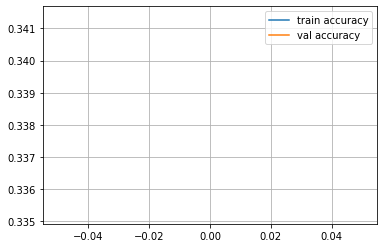

Epoch 1
Train accuracy: 0.33544504276211595
Val accuracy: 0.3416256157635468


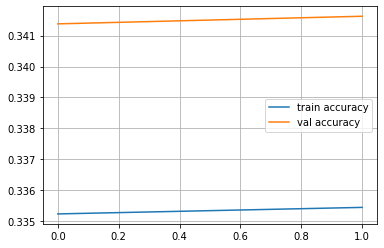

Epoch 2
Train accuracy: 0.3359729701193116
Val accuracy: 0.34211822660098523


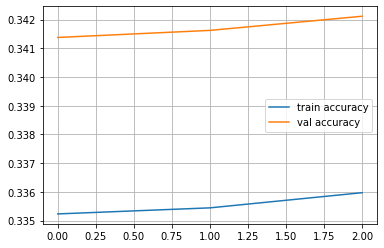

Epoch 3
Train accuracy: 0.33618414106218986
Val accuracy: 0.34334975369458126


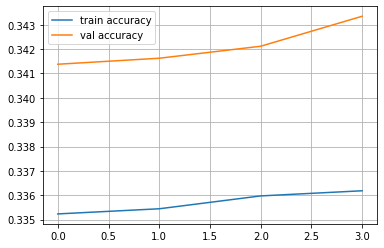

Epoch 4
Train accuracy: 0.33650089747650724
Val accuracy: 0.3438423645320197


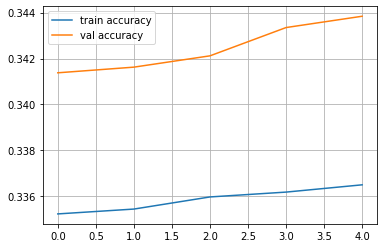

Epoch 5
Train accuracy: 0.33681765389082463
Val accuracy: 0.34458128078817735


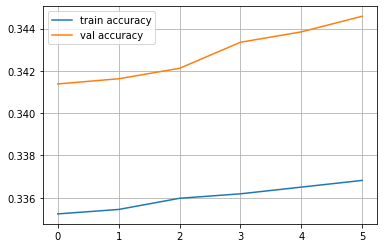

Epoch 6
Train accuracy: 0.33723999577658115
Val accuracy: 0.3440886699507389


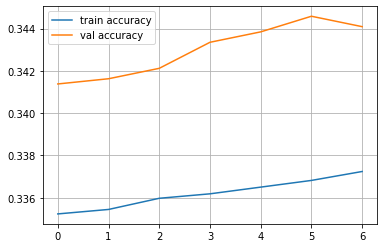

Epoch 7
Train accuracy: 0.3433639531200507
Val accuracy: 0.3502463054187192


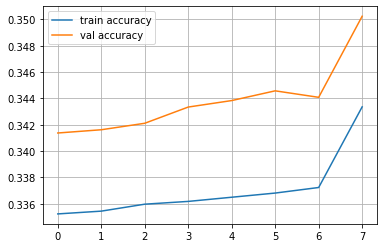

Epoch 8
Train accuracy: 0.36764861155105055
Val accuracy: 0.3733990147783251


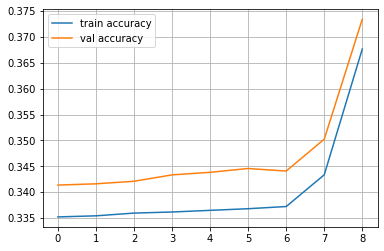

Epoch 9
Train accuracy: 0.387498680181607
Val accuracy: 0.38645320197044336


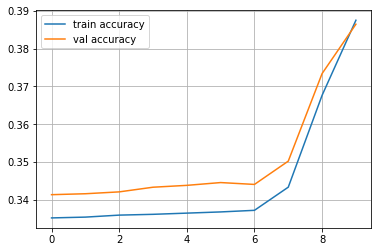

Epoch 10
Train accuracy: 0.402069475240207
Val accuracy: 0.4009852216748768


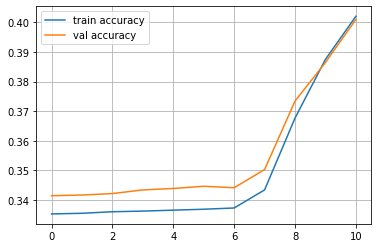

Epoch 11
Train accuracy: 0.40946045824094607
Val accuracy: 0.40935960591133


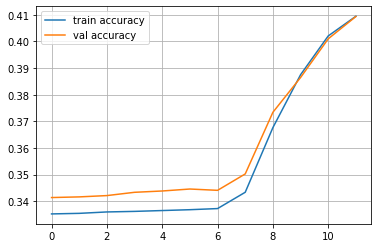

Epoch 12
Train accuracy: 0.4153732446415373
Val accuracy: 0.4140394088669951


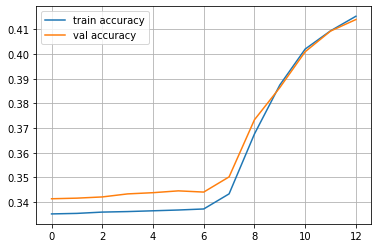

Epoch 13
Train accuracy: 0.42308098405659383
Val accuracy: 0.4253694581280788


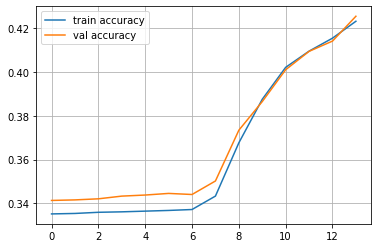

Epoch 14
Train accuracy: 0.4307887234716503
Val accuracy: 0.42931034482758623


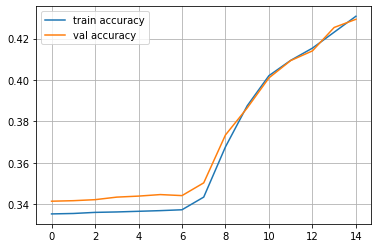

Epoch 15
Train accuracy: 0.4309998944145286
Val accuracy: 0.43817733990147784


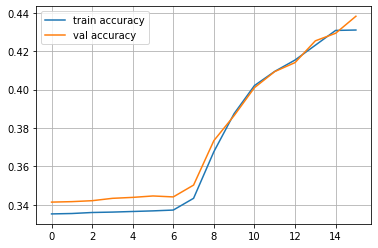

Epoch 16
Train accuracy: 0.43839087741526767
Val accuracy: 0.43940886699507387


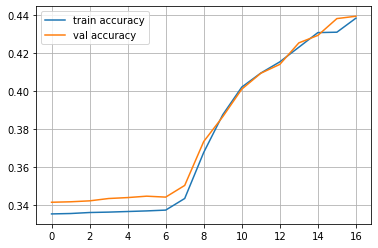

Epoch 17
Train accuracy: 0.4420863689156372
Val accuracy: 0.4480295566502463


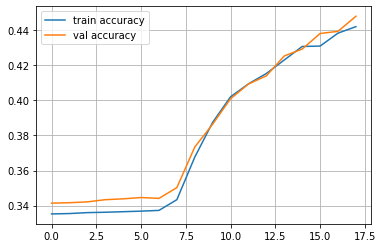

Epoch 18
Train accuracy: 0.44229753985851544
Val accuracy: 0.45123152709359604


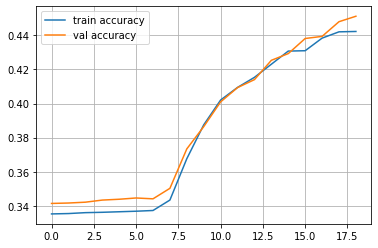

Epoch 19
Train accuracy: 0.4458874458874459
Val accuracy: 0.4559113300492611


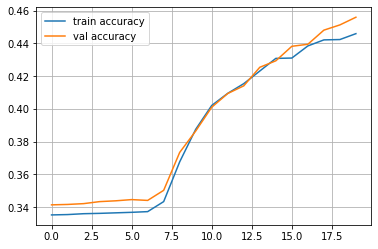

Epoch 20
Train accuracy: 0.44683771513039805
Val accuracy: 0.45689655172413796


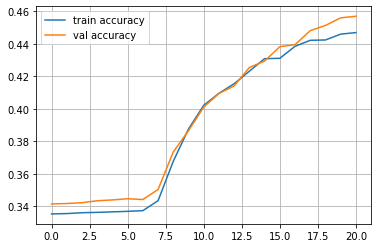

Epoch 21
Train accuracy: 0.44863266814486324
Val accuracy: 0.45615763546798027


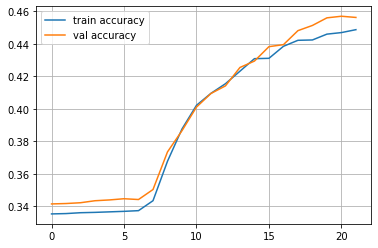

Epoch 22
Train accuracy: 0.4497941083306937
Val accuracy: 0.45


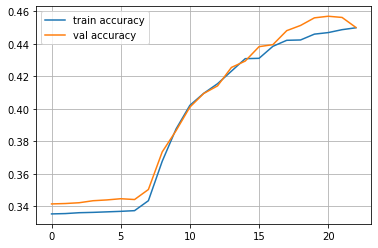

Epoch 23
Train accuracy: 0.4530672579453067
Val accuracy: 0.4517241379310345


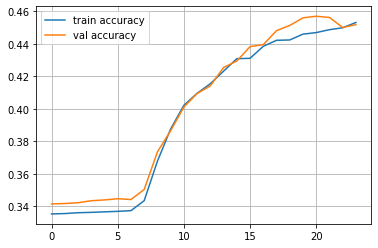

Epoch 24
Train accuracy: 0.4556013092598458
Val accuracy: 0.454679802955665


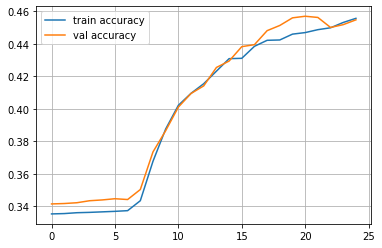

precision: 0.4529714197421628
recall: 0.4574755281561564
f1: 0.4469831739365027
accuracy: 0.454679802955665
Confusion matrix: 
[[706 319 312]
 [110 827 400]
 [331 742 313]]


In [ ]:
from IPython.display import clear_output
import numpy as np

network = MLP([10, 15, 20, 3], len(inputs))

train_log = []
val_log = []

for epoch in range(25):
    network.fit(X_train, y_train_int)   
    train_log.append(np.mean(network.predict(X_train) == y_train_int))
    val_log.append(np.mean(network.predict(X_test) == y_test_int))
    #clear_output()
    print("Epoch", epoch)
    print("Train accuracy:", train_log[-1])
    print("Val accuracy:", val_log[-1])  
    plt.plot(train_log,label = 'train accuracy')
    plt.plot(val_log,label = 'val accuracy')
    plt.legend(loc = 'best')
    plt.grid()
    plt.show()

y_pred = network.predict(X_test)
y_pred_names = []
for i in range(y_pred.shape[0]):
  y_pred_names.append(genre_dec[y_pred[i]])

eval = Evaluate(y_test, y_pred_names)
eval.get_evaluation_report()


## Ready Multi-Layer Perceptron


In [ ]:
from sklearn.neural_network import MLPClassifier

epochs = 25
mlp = MLPClassifier(hidden_layer_sizes=(10, 15, 20), max_iter = epochs)

mlp.fit(X_train,y_train)

y_pred = mlp.predict(X_test)
eval = Evaluate(y_test, y_pred)
eval.get_evaluation_report()

precision: 0.7201403347034399
recall: 0.7105069644336659
f1: 0.7087124389354275
accuracy: 0.7110837438423645
Confusion matrix: 
[[ 778  242  317]
 [  54 1058  225]
 [ 163  172 1051]]


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (25) reached and the optimization hasn't converged yet.
  ConvergenceWarning,


## Comparison of implementations

  
We compared your results both in terms of execution times and in terms of results. The difference in the results results from the fact that in the ready class there have been several optimizations in the operation, in the way of training etc. resulting in better results. However, in our class we have better control and we have the ability to design more complex architectures as we change the parameter values ​​that in the finished class we may not be able to.

Comment:

ΚΝΝ:


* Very simple classifier
* Trained fast
* Can not learn complex separation surfaces

Naive Bayes:


* Simple classifier
* Trained fast
* Can be scaled easily
* The assumption of feature independence is not always valid


MLP:


* More complex implementation compared to the previous ones
* Can learn very complex separation surfaces with the right number of trainable parameters
* Risk of Overfitting (many layers and units)